<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/Chu%C3%A2%CC%89n_ho%CC%81a_d%C6%B0%CC%83_li%C3%AA%CC%A3u_vo%CC%81i_Min_Max_scalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# khởi tạo dữ liệu

In [2]:
df_center = pd.DataFrame(
    {
        'beta': np.random.beta( 5, 1, 1000 ) * 60,
        'exponential':  np.random.exponential(10,1000),
        'normal_l': np.random.normal(10, 2, 1000),
        'normaol_y': np.random.normal(10,10,1000)
    }
)

In [3]:
df_center.head()

,beta,exponential,normal_l,normaol_y
0,46.022655,14.696540,7.133309,12.585832
1,56.575112,4.144305,8.667912,19.719642
2,57.702205,2.009759,10.567827,3.695142
3,55.782014,16.600763,13.613535,-9.011380
4,55.382852,4.029176,6.054477,2.298075


# thêm dữ liệu được tạo theo phân phối nhị thức

In [4]:
first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([first_half, second_half])

In [5]:
type(bimodal)

numpy.ndarray

In [6]:
df_center['bimodal'] = bimodal

In [7]:
df_center.head()

,beta,exponential,normal_l,normaol_y,bimodal
0,46.022655,14.696540,7.133309,12.585832,19.821505
1,56.575112,4.144305,8.667912,19.719642,14.407408
2,57.702205,2.009759,10.567827,3.695142,17.144169
3,55.782014,16.600763,13.613535,-9.011380,19.054824
4,55.382852,4.029176,6.054477,2.298075,21.509922


# Trực quan hóa dữ liệu với seaborn as sns

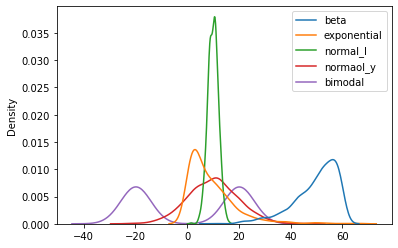

In [8]:
sns.kdeplot(data = df_center)

- thêm cột dữ liệu 

In [9]:
big = np.random.normal(10000000, 100000, (1000,1))
df_center['big'] = big

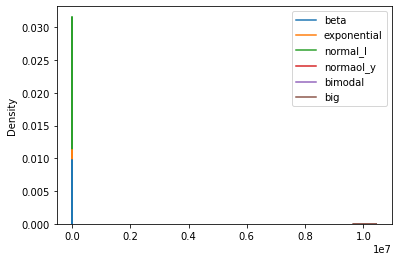

In [10]:
sns.kdeplot(data = df_center)

# chuẩn hóa với MinMaxScaler

In [11]:
scaler = MinMaxScaler()
df_s = scaler.fit_transform(df_center)


In [12]:
col_names = list(df_center.columns)
df_s = pd.DataFrame(df_s, columns = col_names)

In [13]:
df_s.head()

,beta,exponential,normal_l,normaol_y,bimodal,big
0,0.713636,0.222325,0.377167,0.511535,0.846453,0.337837
1,0.929849,0.062581,0.481121,0.615979,0.753222,0.406761
2,0.952942,0.030268,0.609821,0.381368,0.800349,0.254884
3,0.913599,0.251152,0.816137,0.195335,0.833251,0.646500
4,0.905420,0.060839,0.304087,0.360914,0.875528,0.274156


- chuẩn hóa dữ liệu với seaborn as sns

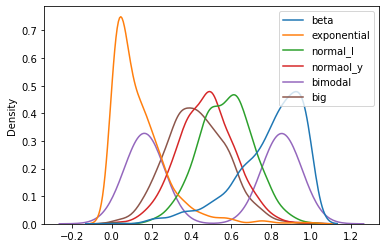

In [14]:
sns.kdeplot(data = df_s)

- chuẩn hóa dữ liệu với boxplot

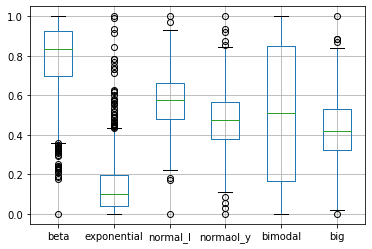

In [15]:
df_s.boxplot()

# bảng thống kê dữ liệu được sinh ra

In [16]:
df_s.describe()

,beta,exponential,normal_l,normaol_y,bimodal,big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.791070,0.140721,0.572247,0.474243,0.507155,0.426677
std,0.172863,0.141438,0.136254,0.141600,0.348362,0.150084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700053,0.039847,0.480470,0.376991,0.164621,0.323354
50%,0.834613,0.100172,0.576670,0.477554,0.511134,0.419562
75%,0.926517,0.198010,0.664607,0.567065,0.851227,0.532699
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_l     1000 non-null   float64
 3   normaol_y    1000 non-null   float64
 4   bimodal      1000 non-null   float64
 5   big          1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


- đọc giá trị min của beta

In [18]:
df_s['beta'].min()

0.0

- đọc giá trị max của beta

In [19]:
df_s['beta'].max()

1.0

- in ra các dữ liệu min chưa được chuẩn hóa

In [85]:
mins =pd.DataFrame([df_center[col].min()  for col in df_center.columns])


In [88]:
mins

,0
0,1.119297e+01
1,1.033827e-02
2,1.565441e+00
3,-2.235327e+01
4,-2.933337e+01
5,9.720879e+06


In [30]:
df_center.describe()

,beta,exponential,normal_l,normaol_y,bimodal,big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,49.801873,9.306020,10.013148,10.038730,0.117922,9.997186e+06
std,8.436762,9.343000,2.011428,9.671648,20.229909,9.719071e+04
min,11.192972,0.010338,1.565441,-22.353269,-29.333368,9.720879e+06
25%,45.359695,2.642500,8.658294,3.396184,-19.773559,9.930276e+06
50%,51.927013,6.627422,10.078435,10.264860,0.349008,9.992578e+06
75%,56.412472,13.090376,11.376589,16.378668,20.098756,1.006584e+07
max,59.998892,66.067724,16.327778,45.949244,28.738224,1.036846e+07


In [97]:
len(mins)

6

In [105]:
mi = {col_names[0] : mins.iloc[0, :]}
for i in range(1,len(mins)):
  mi[col_names[i]] = mins.iloc[i, :]
df_mins= pd.DataFrame(mi)

In [106]:
df_mins.head()

,beta,exponential,normal_l,normaol_y,bimodal,big
0,11.192972,0.010338,1.565441,-22.353269,-29.333368,9.720879e+06


# in ra các giá trị max

In [107]:
max = pd.DataFrame(df_center[col].max() for col in col_names)

In [110]:
ma = {col_names[0]: max.iloc[0, :]}
for i in range(1, len(max)):
  ma[col_names[i]] = max.iloc[i,:]
df_maxs = pd.DataFrame(ma)

In [111]:
df_maxs.head()

,beta,exponential,normal_l,normaol_y,bimodal,big
0,59.998892,66.067724,16.327778,45.949244,28.738224,1.036846e+07
